In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
# from scikits.samplerate import resample
from scipy.signal import resample

fs = 44100
fr = 48000
fSignal=1000
tAxis1 = np.arange(fs * 2)/fs
tAxis2 = np.arange(fr * 2)/fr
# Signal to resample
sins = np.sin(2 * np.pi * fSignal * tAxis1)
# Ideal resampled signal
idsin = np.sin(2 * np.pi * fSignal * tAxis2)

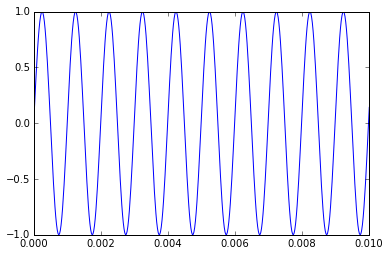

In [2]:
_=plt.plot(tAxis1, sins)
# _=plt.plot(tAxis2, idsin)
_=plt.xlim(0,1e-2)

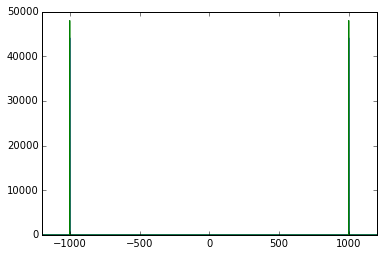

In [3]:
#compaire fft of both signals
f1=np.arange(tAxis1.size)/tAxis1.size*fs-(fs/2)
f2=np.arange(tAxis2.size)/tAxis2.size*fr-(fr/2)
S1=np.fft.fft(sins)
S2=np.fft.fft(idsin)
_=plt.plot(f1,np.fft.fftshift(np.abs(S1)))
_=plt.plot(f2,np.fft.fftshift(np.abs(S2)))
_=plt.xlim(-1200,1200)

In [4]:
conv1 = resample(sins, fr * 2)

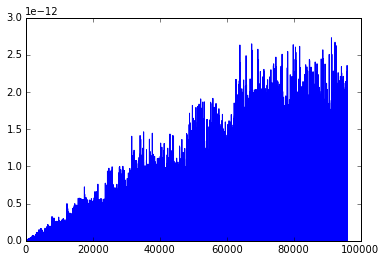

In [5]:
err1=np.abs(conv1-idsin)
_=plt.plot(err1)

In [ ]:

conv1   = resample(sins, fr/fs, 'linear')
conv3   = resample(sins, fr/fs, 'sinc_best')

err1    = conv1[fr:fr+2000] - idsin[fr:fr+2000]
err3    = conv3[fr:fr+2000] - idsin[fr:fr+2000]

plt.subplot(3, 1, 1)
plt.plot(idsin[fs:fs+2000])
plt.title('Resampler residual quality comparison')

plt.subplot(3, 1, 2)
plt.plot(err1)
plt.ylabel('Linear')

# plt.subplot(3, 1, 3)
# plt.plot(err3)
# plt.ylabel('Sinc')

# plt.savefig('example1.png', dpi = 100)